In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import drms
%matplotlib inline

In [2]:
series = 'hmi.sharp_720s'
sharpnum = 4315
kwlist = ['T_REC', 'LON_FWT', 'AREA_ACR', 'MEANGAM', 'USFLUX', 'ERRVF', 'MEANJZH', 'ERRMIH']

Create DRMS client and query metadata:

In [3]:
c = drms.Client()
k = c.query('%s[%d]' % (series, sharpnum), key=kwlist)

Use T_REC timestamps as DataFrame index:

In [4]:
k.index = drms.to_datetime(k.T_REC)

Find time of the record closest to the central meridian:

In [5]:
t_cm = k.LON_FWT.abs().argmin()

We change some matplotlib options to make things easier for plotting:

In [6]:
plt.rc('axes', titlesize='medium')
plt.rc('axes.formatter', use_mathtext=True)
plt.rc('mathtext', default='regular')
plt.rc('legend', fontsize='medium')

In the following we are creating the plot and save the figures as PDF and PNG.

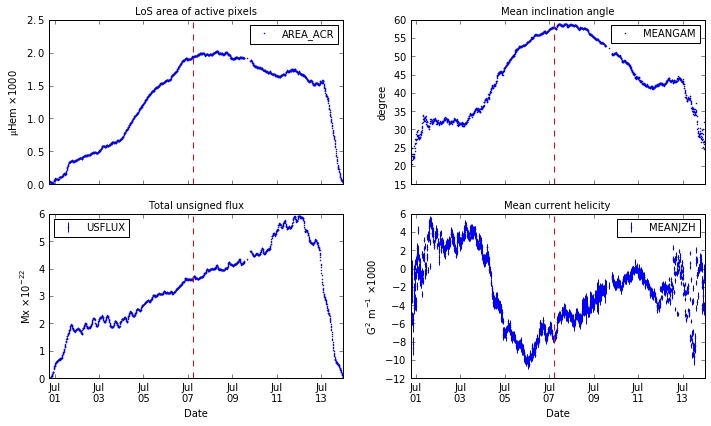

In [7]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(10, 6))

axi = ax[0,0]
axi.plot(k.index, k.AREA_ACR/1e3, '.', ms=2, label='AREA_ACR')
axi.set_title('LoS area of active pixels')
axi.set_ylabel(r'$\mu$Hem $\times 1000$')

axi = ax[0, 1]
axi.plot(k.index, k.MEANGAM, '.', ms=2, label='MEANGAM')
axi.set_title('Mean inclination angle')
axi.set_ylabel('degree')

axi = ax[1, 0]
axi.errorbar(k.index, k.USFLUX/1e22, yerr=k.ERRVF/1e22, fmt='.', ms=2,
             capsize=0, label='USFLUX')
axi.set_title('Total unsigned flux')
axi.set_ylabel(r'Mx $\times 10^{\minus 22}$')
axi.set_xlabel('Date')

axi = ax[1, 1]
axi.errorbar(k.index, k.MEANJZH*1e3, yerr=k.ERRMIH*1e3, fmt='.', ms=2,
             capsize=0, label='MEANJZH')
axi.set_title('Mean current helicity')
axi.set_ylabel(r'G$^2$ m$^{\minus 1}$ $\times 1000$')
axi.set_xlabel('Date')

axi.xaxis.set_major_locator(dates.AutoDateLocator())
axi.xaxis.set_major_formatter(dates.DateFormatter('%b\n%d'))

for axi in ax.flatten():
    axi.axvline(t_cm, ls='--', color='r')
    axi.legend(loc='best', numpoints=1)

fig.tight_layout(pad=1.2, w_pad=2)
plt.draw()

fig.savefig('sharp_metadata.pdf')
fig.savefig('sharp_metadata.png', dpi=200)